<a href="https://colab.research.google.com/github/mark-ortiz/Doctorado/blob/main/Regresi%C3%B3n_Lineal_M%C3%BAltiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Ejemplo de Regresión Lineal Múltiple con el Dataset California Housing**
Fecha de Inicio del Ejercicio: 27 Jun 2022

## **Obtención de los datos y Limpieza**

In [1]:
# Importamos las librerías que utilizaremos a lo largo del Ejercicio
import numpy as np
import pandas as pd
# Librerías para generar gráficas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Obtenemos los datos de los datasets de sklearn
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [3]:
#Observamos la "organización" de los datos en el "diccionario"
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
#Imprimimos la descripción para entender qué es cada llave del diccionario
print(dataset['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
#Revisando el nombre de los "features"
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [6]:
#Creamos el dataframe con los puros datos (features)
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [7]:
#Observamos algunas estadísticas descriptivvas y las columnas del dataframe obtenido para los datos
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [8]:
#Se eliminan las columnas Latitud y Longitud para facilidad del ejemplo y se genera el df X
X = data.drop(['Latitude', 'Longitude'], axis=1)

In [9]:
#Creamos el dataframe con los precios de cada registro
y = pd.DataFrame(dataset.target, columns=dataset.target_names)

In [10]:
#Observamos los dos dataframes con los que entrenaremos el modelo de regresión
#Deben tener el mismo número de observaciones (registros)
display(X.describe())
display(y.describe())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


## **Análisis Exploratorio de Datos (EDA)**

### EDA Inicial

In [11]:
z = {"MedInc": "Median income in block group", 
    "HouseAge": "Median house age in block group",
    "AveRooms":  "Average number of rooms per household",
    "AveBedrms": "Average number of bedrooms per household",
    "Population": "block group population",
    "AveOccup": "average number of household members"
    }

In [12]:
#Generamos algunas gráficas para "entender y visualizar" los datos y sus relaciones

In [13]:
######################################################################################
### Esta fue el primer intento para graficar pero se mejoró en la siguiente celda ####

#Graficando cada feature vs el target que es MedHouseVal
#for i in range(len(X.columns)):
#  #print(X.columns[i])
#  plt.figure(i)
#  plt.title(X.columns[i])
#  plt.xlabel(z.get(X.columns[i]))
#  plt.ylabel(y.columns[0])
#  plt.scatter(X[X.columns[i]], y)
#plt.show()

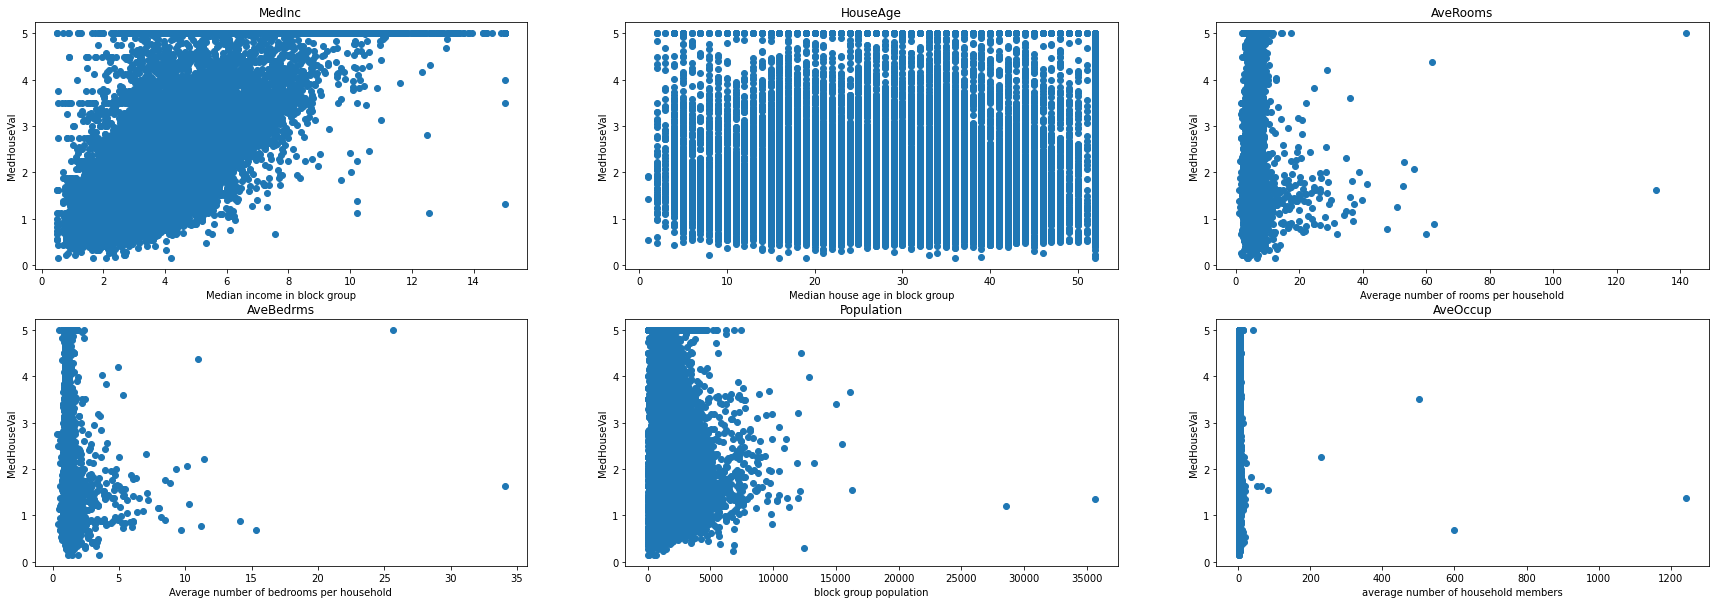

In [14]:
#Otra opción para graficar no sólo en una línea sino utilizando toda la pantalla para "neat" visualization
#Graficando cada feature vs el target que es MedHouseVal
#El manejo y conocimiento de matplotlib puede ser complejo para el arreglo de diversas gráficas

#Opcion para iterar sobre los ejes
fig, axs = plt.subplots(2,3) #Esta forma de definir axs permite iterar
fig.set_size_inches(30,10) #Esta es una forma de modificar el tamaño de la "figura" y que funciono en este caso

for i, ax in enumerate(fig.axes):
  ax.scatter(X[X.columns[i]],y)
  ax.set_title(X.columns[i])
  ax.set_xlabel(z.get(X.columns[i]))
  ax.set_ylabel(y.columns[0])

plt.show()

In [15]:
######################################################################################
### Esta fue el primer intento para boxplots pero se mejoró en la siguiente celda ####

#Generamos boxplots para visualizar y entender mejor los outliers

#for i in range(len(X.columns)):
#  plt.figure(i)
#  plt.title(X.columns[i])
#  #plt.xlabel(z.get(X.columns[i]))
#  #plt.ylabel(y.columns[0])
#  plt.boxplot(X[X.columns[i]])
#plt.show()

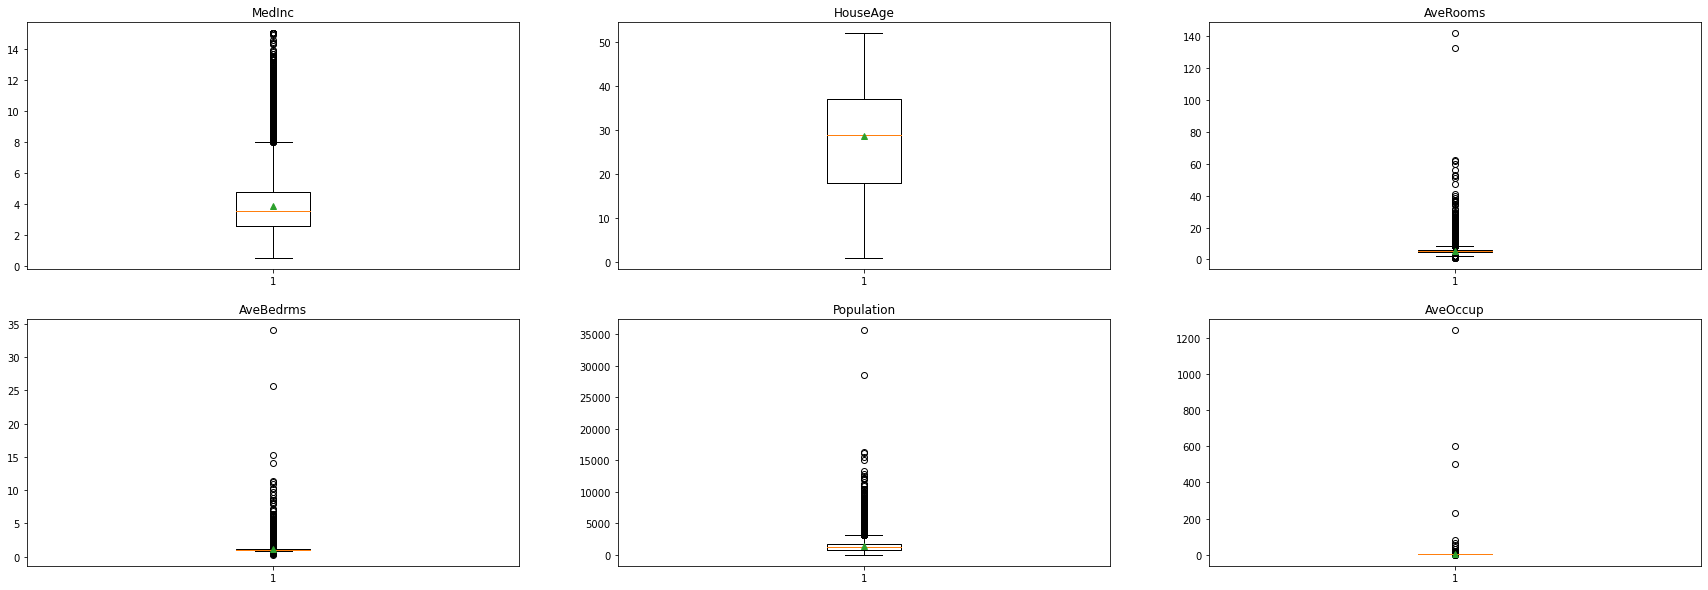

In [16]:
#Generamos boxplots para visualizar y entender mejor los outliers

fig, axs = plt.subplots(2,3) #Esta forma de definir axs permite iterar
fig.set_size_inches(30,10) #Esta es una forma de modificar el tamaño de la "figura" y que funciono en este caso

for i, ax in enumerate(fig.axes):
  ax.boxplot(X[X.columns[i]], showmeans=True)
  ax.set_title(X.columns[i])
  
#plt.tight_layout()
plt.show()

### Filtrado para eliminar outliers y eliminar datos no claros

In [17]:
#Juntamos los dataframes X e y para posteriormente hacer el filtrado de lo que se considere como outliers
datan = pd.concat([X,y], axis=1)
display(datan.head())
print(datan.shape)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


(20640, 7)


In [18]:
#Eliminando los registros que tengan más de 5 Bedrooms y Occupancy < 200
datan = datan[ (datan['AveBedrms']<=5) & (datan['AveOccup']<=6) & (datan['AveRooms']<=12) ]
print(datan.shape)
#Separando los features del target
yn = pd.DataFrame(datan['MedHouseVal'])
Xn = datan.drop(['MedHouseVal'], axis=1)

(20382, 7)


In [19]:
#Vistazo al dataframe Xn
display(Xn.sample(5))
print(Xn.shape)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
13215,6.5958,17.0,6.957031,1.023438,860.0,3.359375
12471,1.7765,40.0,3.949008,1.124646,689.0,1.951841
19775,1.9191,9.0,4.984615,1.103846,768.0,2.953846
1845,6.3538,49.0,6.293886,1.017751,1148.0,2.264300
3032,4.4561,12.0,6.094875,1.026172,3018.0,3.291167


(20382, 6)


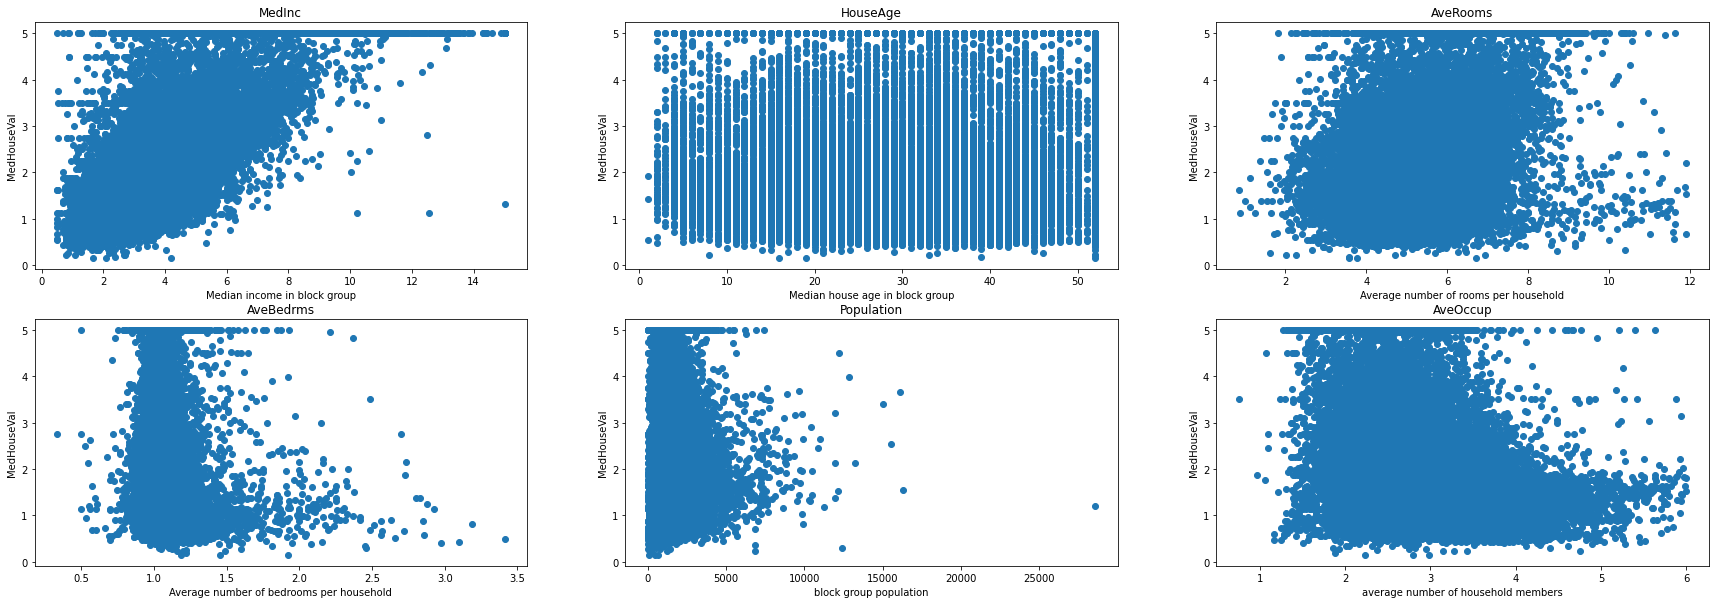

In [20]:
#Graficando nuevamente cada feature vs el target con solo 5 recamaras o menos y 6 o menos habitantes en casa
fig, axs = plt.subplots(2,3) #Esta forma de definir axs permite iterar
fig.set_size_inches(30,10) #Esta es una forma de modificar el tamaño de la "figura" y que funciono en este caso

for i, ax in enumerate(fig.axes):
  ax.scatter(Xn[Xn.columns[i]],yn)
  ax.set_title(Xn.columns[i])
  ax.set_xlabel(z.get(Xn.columns[i]))
  ax.set_ylabel(yn.columns[0])

plt.show()

In [21]:
###########################################################################
######       Primer intento de generación de histogramas         ##########
#Obteniendo histogramas de cada feature para apreciar mejor su distribución
#for i in range(len(Xn.columns)):
#  plt.figure(i)
#  plt.title(Xn.columns[i])
#  plt.xlabel(z.get(X.columns[i]))
#  plt.ylabel("Items")
#  plt.hist(Xn[Xn.columns[i]], bins='auto')
#plt.show()

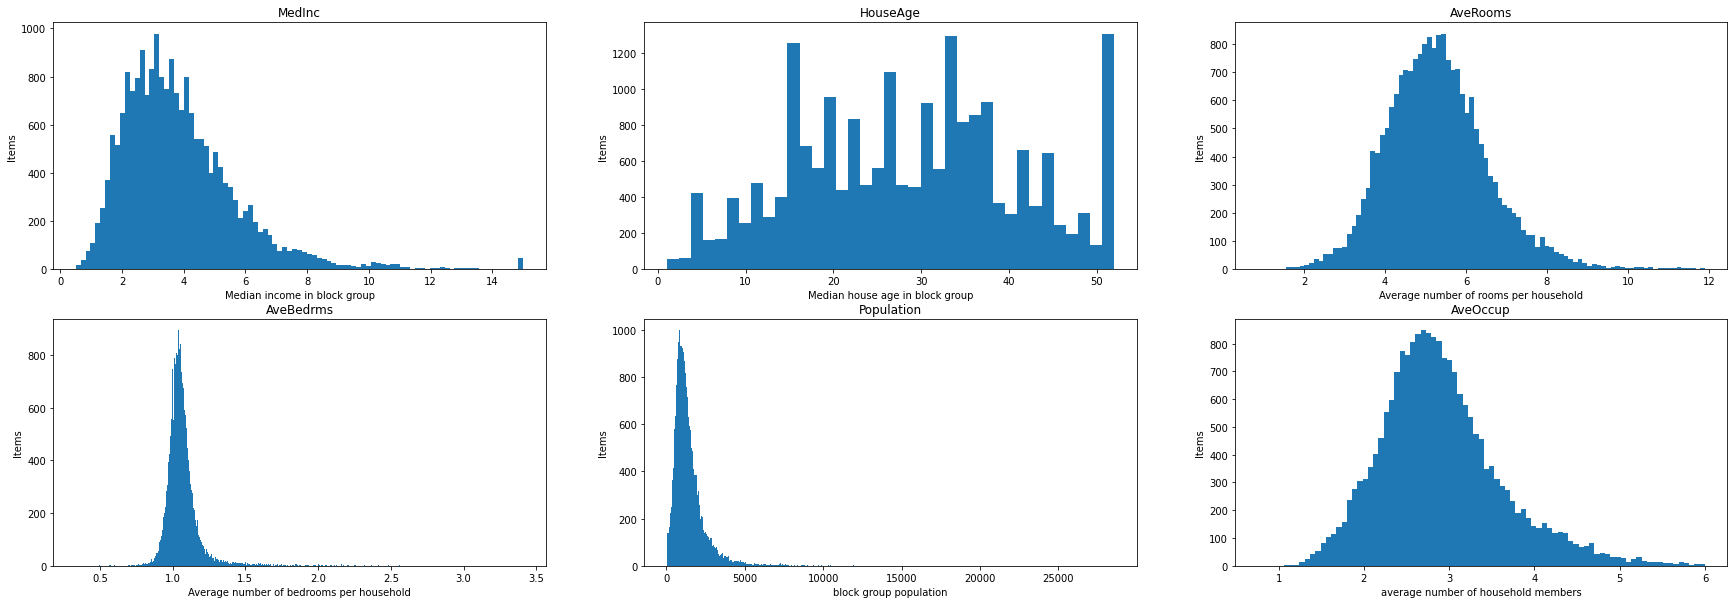

In [22]:
#Mejora de los plots de los histogramas
fig, axs = plt.subplots(2,3) #Esta forma de definir axs permite iterar
fig.set_size_inches(30,10) #Esta es una forma de modificar el tamaño de la "figura" y que funciono en este caso

for i, ax in enumerate(fig.axes):
  ax.hist(Xn[Xn.columns[i]], bins='auto')
  ax.set_title(Xn.columns[i])
  ax.set_xlabel(z.get(Xn.columns[i]))
  ax.set_ylabel("Items")

plt.show()

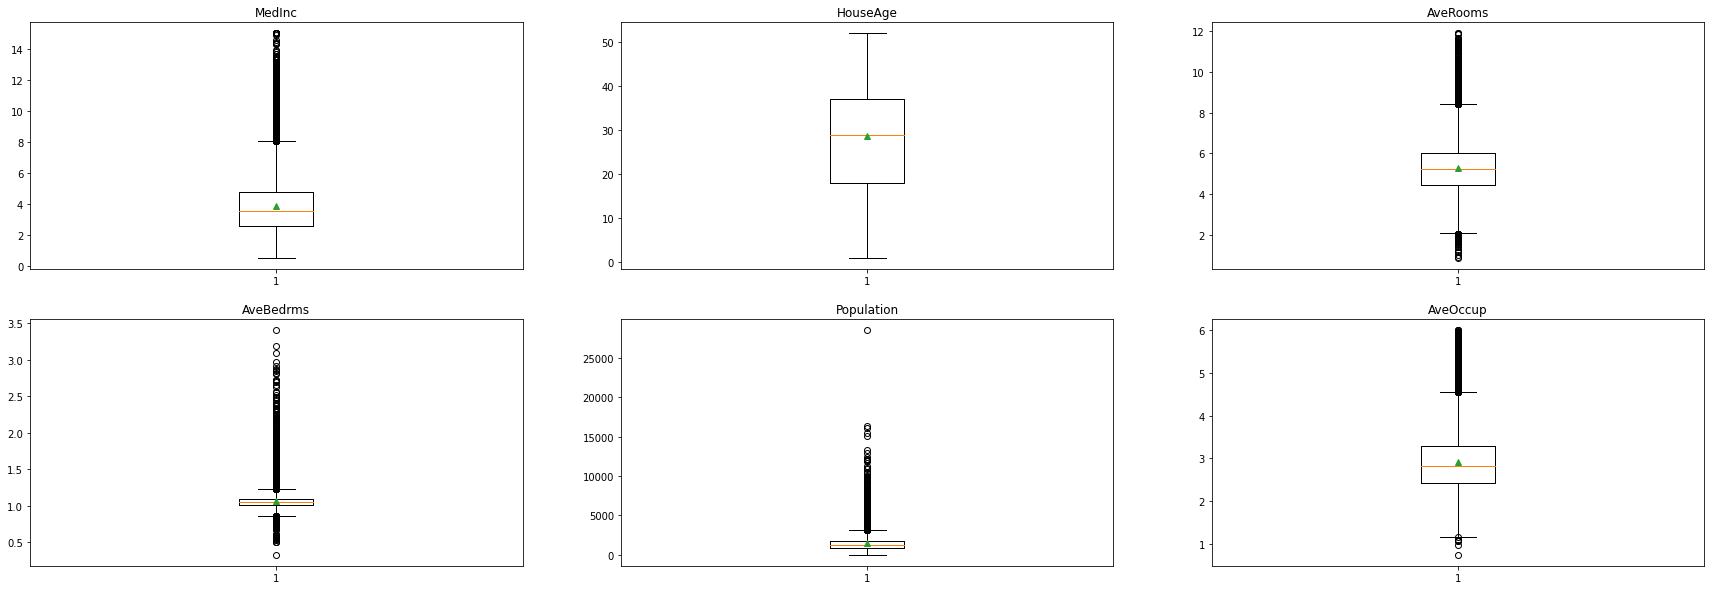

In [23]:
#Volvemos a generar boxplots para visualizar y entender mejor los outliers después del filtrado
fig, axs = plt.subplots(2,3) #Esta forma de definir axs permite iterar
fig.set_size_inches(30,10) #Esta es una forma de modificar el tamaño de la "figura" y que funciono en este caso

for i, ax in enumerate(fig.axes):
  ax.boxplot(Xn[Xn.columns[i]], showmeans=True)
  ax.set_title(Xn.columns[i])
  
plt.show()

In [24]:
print(Xn.shape, yn.shape)

#plt.hist(yn)

(20382, 6) (20382, 1)


In [25]:
#Analizando el target
#Histograma
#yn.hist(bins='auto')
#Boxplot
#plt.boxplot(yn)
#plt.show()

**El analisis exploratorio inicial y el filtrado nos llevan a analizar ciertas cosas extrañas**

Por ejemplo... ¿Cómo es que hay decimales en las recámaras?, ¿no deberían ser enteros?

Veamos...

In [26]:
Xn['AveBedrms'].describe()


count    20382.000000
mean         1.069829
std          0.143091
min          0.333333
25%          1.005747
50%          1.048085
75%          1.097858
max          3.411111
Name: AveBedrms, dtype: float64

***Lo anterior nos indica que pudieron haber tomado promedios, ya que no hay "pedazos" de recámaras en general.***

En la siguiente sección analizaremos las correlaciones para ver si debemos/podemos eliminar más outliers o procedemos al modelado

## Entendiendo las relaciones y correlación entre las variables del dataset (features)

Posterior a la eliminación de algunos outliers, observaremos primero las relaciones con una gráfica tipo pairplot y posteriormente las correlaciones y su coeficiente de correlación.

In [27]:
#Verificamos que no existan datos faltantes o nan en el dataset
print(Xn.isna().value_counts())
print(yn.isna().value_counts())

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
False   False     False     False      False       False       20382
dtype: int64
MedHouseVal
False          20382
dtype: int64


***Como se puede apreciar en la celda previa, no existen faltantes en el dataset y/o valores nan, por lo que podemos proceder con el análisis y modelado posterior***

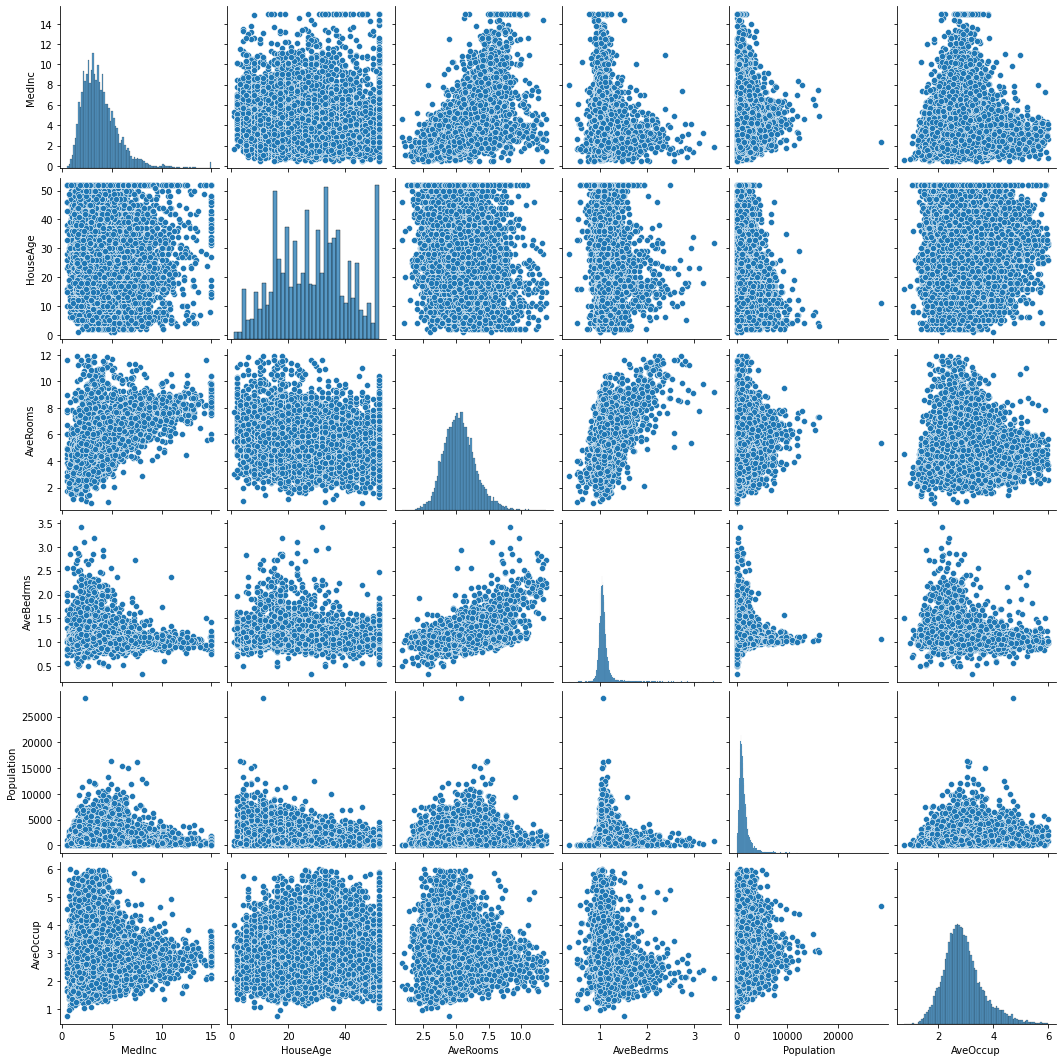

In [28]:
# Gráfica tipo Pairplot utilizando Seaborn
sns.pairplot(Xn, diag_kws={'bins': 'auto'})
plt.show()

De acuerdo a las correlaciones previas, todavía se puede apreciar algunos outliers, sin embargo las distribuciones ya tienden más a la forma normal, por lo que podríamos pasar al modelado sin eliminar más observaciones o hacer algún otro proceso de tratamiento/preparación de la data.

Se puede tomar otro "approach" al problema de los outliers como el que realizó Amal Tanveer el cual se puede observar en la sig referencia:
https://medium.com/cs-334-data-science/predicting-housing-prices-in-california-331334f53ad7


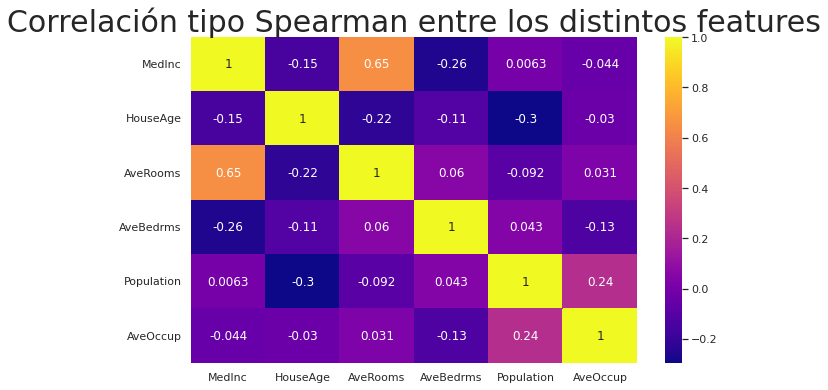

In [29]:
#Más de correlaciones
sns.set(rc={"figure.figsize":(10,6)}) #width=8, height=6 #Esto es para ajustar el tamaño del plot
sns.heatmap(Xn.corr('spearman'), annot=True, cmap='plasma')
plt.title('Correlación tipo Spearman entre los distintos features', size=30)
plt.show()

# Referencia para el tamaño del plot
# https://www.statology.org/seaborn-figure-size/

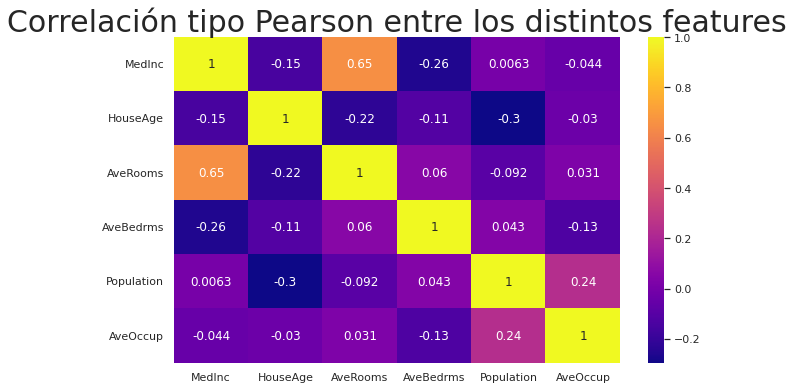

In [30]:
#Más de correlaciones
sns.set(rc={"figure.figsize":(10,6)}) #width=8, height=6 #Esto es para ajustar el tamaño del plot
sns.heatmap(Xn.corr('spearman'), annot=True, cmap='plasma')
plt.title('Correlación tipo Pearson entre los distintos features', size=30)
plt.show()

# Referencia
# https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/

In [31]:
#Matriz de correlación
corr_matrix = Xn.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
MedInc,1.000000,-0.120791,0.653359,-0.163922,0.006854,-0.067178
HouseAge,-0.120791,1.000000,-0.221944,-0.123677,-0.311414,-0.006420
AveRooms,0.653359,-0.221944,1.000000,0.305262,-0.040896,-0.033862
AveBedrms,-0.163922,-0.123677,0.305262,1.000000,-0.035521,-0.109364
Population,0.006854,-0.311414,-0.040896,-0.035521,1.000000,0.180449
AveOccup,-0.067178,-0.006420,-0.033862,-0.109364,0.180449,1.000000


### **Modelado**

In [32]:
#Division del dataset para entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, yn, test_size=0.2, random_state=10)

In [33]:
#Creación y "fit" del módelo de Regresión Lineal Múltiple
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test )

In [34]:
# Métricas de precisión del modelo
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Mean Absolute Error (MAE): %.2f" %mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): %.2f" %np.sqrt(mean_squared_error(y_test, y_pred)))
print("R squared: %.2f" %r2_score(y_test,y_pred))

Mean Absolute Error (MAE): 0.54
Root Mean Squared Error (RMSE): 0.74
R squared: 0.59


Métricas de Precisión:
* https://scikit-learn.org/stable/modules/model_evaluation.html



# **CONCLUSIONES**

El análisis de regresión lineal o regresión lineal múltiple pudiera parecer de los más sencillos, sin embargo esto no es así, ya que se debe tomar en cuenta que se puede complicar debido a que los datos pueden ser bastante complejos y por ende su tratamiento tanto para la limpieza como en la eliminación o tratamiento de los "outliers".

Adicionalmente, dependiendo del Analista o Científico de Datos, pueden existir diversas formas de atacar el problema, lo cual puede llevar a obtener diferentes métricas de precisión, con lo cual el modelo de predicción generado puede ser mejor o peor dependiendo del resultado deseado, de las variables a involucrar y de los criterior para eliminación de outliers.